# Regular Expressions
<br>\w mathes any letter or digit, e.g. 'a'
<br>\d matches digit, e.g. 9
<br>\s matches space , e.g. ' '
<br>.* is a wildcard character to match any word or symbol
<br> + or * is for greedy match, + is 1 or more, * is zero or more i.e. \w+ matches any word, e.g. 'Magic'
<br>\S is for NOT space (caps is for NOT)
<br>[a-z] is for all a to z inclusive

<br>Import the re module to use regular expressions, i.e. import re
<br>To split a string on regex, use split. Returns a list of all strings EXCEPT the matched strings
<br>To find all patters in a string, use findall
<br>To search for a pattern, use search
<br>To match a pattern, use re.match(), e.g. re.match('abc', 'abcdef')

In [1]:
mystring = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [2]:
import re

In [3]:
# Match all words that end in a symbol, i.e. !, ?, . which translates to either \w+\. \w+\? or \w+\!
re.findall('\w+\.|\w+\?|\w+\!', mystring)

['RegEx!', 'fun?', 'so.', 'sentences?', 'words?']

In [4]:
re.split('\w+\.|\w+\?|\w+\!', mystring)

["Let's write ",
 "  Won't that be ",
 '  I sure think ',
 '  Can you find 4 ',
 '  Or perhaps, all 19 ',
 '']

In [5]:
# Find all capitalised words
re.findall("[A-Z]\w+",mystring)

['Let', 'RegEx', 'Won', 'Can', 'Or']

In [6]:
# How many SINGLE spaces are there?
len(re.findall("\s",mystring))

24

In [7]:
# How many complete spaces are there? i.e. count two spaces as one
len(re.findall("\s+",mystring))

20

In [8]:
# How many digits
len(re.findall("\d+", mystring))

2

# NLTK Tokenization

In [9]:
from nltk.tokenize import word_tokenize

In [10]:
word_tokenize("Hi there")

['Hi', 'there']

In [11]:
word_tokenize("I don't like Sam's shoes")

['I', 'do', "n't", 'like', 'Sam', "'s", 'shoes']

<br>sent_tokenize tokenizes a document into SENTENCES
<br>regexp_tokenize tokenizes a string or document based on a regular expression pattern
<br>TweetTokenizer is for tweets. Allows for separation of hashtags, mentions and other symbol groups like 
exclamations

In [12]:
# Difference between re.search and re.match
# re.search searches through the string to match any pattern IN the string
# re.match searches FROM THE BEGINNING of the string
# They both return iterator objects
# See below

print(re.search('cd','abcde'))
print(re.match('cd','abcde'))

<_sre.SRE_Match object; span=(2, 4), match='cd'>
None


In [13]:
import requests

In [14]:
# Let's get the SCENE 1 from the file grail.txt
# SCENE 1 is a list of all words from the beginning to the end of SCENE 1
# SCENE 2 is the start of the next scene, so we use re.split to separate the scenes into lists and pick the first part [0]
# This is rather tacky, but this should do

scene_one = re.split("SCENE 2",requests.get("https://github.com/kcemenike/GenericPythonCodes/raw/master/data/grail.txt").text)[0]

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
# Show sentence tokens
sent_tokenize(scene_one)

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!',
 '[clop clop clop] \nSOLDIER #1: Halt!',
 'Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.',
 'King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.',
 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.',
 'I must speak with your lord and master.',
 'SOLDIER #1: What?',
 'Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?',
 "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.",
 'ARTHUR: So?',
 "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?",
 'ARTHUR: We found them.',
 'SOLDIER #1: Found them?',
 'In Mercea?',
 "The coconut's tropic

In [16]:
# show unique word tokens in the fourth sentence(use the set function)
set(word_tokenize(sent_tokenize(scene_one)[3]))

{',',
 '.',
 ':',
 'ARTHUR',
 'Arthur',
 'Camelot',
 'I',
 'It',
 'Pendragon',
 'Uther',
 'castle',
 'from',
 'is',
 'of',
 'son',
 'the'}

In [17]:
re.search("coconuts",scene_one)

<_sre.SRE_Match object; span=(580, 588), match='coconuts'>

In [18]:
re.findall("\[.*\]",scene_one)

['[wind] [clop clop clop]', '[clop clop clop]', '[clop clop clop]']

In [19]:
re.findall("[A-Z]\w+\:",sent_tokenize(scene_one)[3]) # Find 'ARTHUR:' in the fourth sentence of scene_one

['ARTHUR:']

### Advanced regex

In [20]:
re.findall(('\d+|\w+'), 'He has 12 dogs')

['He', 'has', '12', 'dogs']

In [21]:
re.findall("[A-Za-z]+", 'ABCDefgh 123 abcABC abv')

['ABCDefgh', 'abcABC', 'abv']

In [22]:
re.findall("[0-9]+", '1 2 3 45')

['1', '2', '3', '45']

In [23]:
re.findall("[A-Za-z\-\.]+", 'www.etsl-ng.com http://etsl-ng.com')

['www.etsl-ng.com', 'http', 'etsl-ng.com']

In [24]:
re.findall("a-z", 'a-z a z')

['a-z']

In [25]:
re.findall("[a-z0-9 ]+", "match lowercase phrases including numbers like 12, but no symbols, like full stops. or commas")

['match lowercase phrases including numbers like 12',
 ' but no symbols',
 ' like full stops',
 ' or commas']

In [26]:
re.findall("[a-z0-9]+", "match lowercase words only including numbers like 12, but no symbols, like full stops. or commas")

['match',
 'lowercase',
 'words',
 'only',
 'including',
 'numbers',
 'like',
 '12',
 'but',
 'no',
 'symbols',
 'like',
 'full',
 'stops',
 'or',
 'commas']

In [27]:
re.findall(r"(\w+|#\d|\?|!)", "SOLDIER #1: Found them? In Mercea? The coconut's tropical!")

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

In [28]:
tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [29]:
from nltk.tokenize import regexp_tokenize, TweetTokenizer

In [30]:
[regexp_tokenize(tweet, r"\#\w+") for tweet in tweets] #Tokenize Hashtags

[['#nlp', '#python'], ['#NLP', '#learning'], ['#nlp', '#python']]

In [31]:
[regexp_tokenize(tweet, r"[\#|\@]\w+") for tweet in tweets] #hashtags and mentions

[['#nlp', '#python'], ['#NLP', '#learning'], ['@datacamp', '#nlp', '#python']]

In [32]:
[TweetTokenizer().tokenize(tweet) for tweet in tweets] #Using TweetTokenizer

[['This',
  'is',
  'the',
  'best',
  '#nlp',
  'exercise',
  'ive',
  'found',
  'online',
  '!',
  '#python'],
 ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'],
 ['Thanks', '@datacamp', ':)', '#nlp', '#python']]

### Unicode tokenization
Unicode ranges for emoji are below:
('\U0001F300'-'\U0001F5FF'), ('\U0001F600-\U0001F64F'), ('\U0001F680-\U0001F6FF'), and ('\u2600'-\u26FF-\u2700-\u27BF')

Convert unicode to character using chr and vice-versa using ord

In [33]:
german_text = "Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕"

In [34]:
# Tokenize capital letters, including german unicode capital letters

regexp_tokenize(german_text, "[\U0001F300-\U0001F5FF|\U0001F600-\U0001F64F|\U0001F680-\U0001F6FF|\u2600-\u26FF|\u2700-\u27BF]")

['🍕', '🚕']

In [35]:
chr(300)

'Ĭ'

In [36]:
ord('🚕')

128661

In [37]:
chr(128661)

'🚕'

In [38]:
# Exercise: How long is each line in the grail.txt (excluding the character names)

In [39]:
grail = requests.get("https://github.com/kcemenike/GenericPythonCodes/raw/master/data/grail.txt").text

In [40]:
# Split text into lines
lines = grail.split('\n')
for line in lines[:10]:
    print(line)

SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.
SOLDIER #1: What?  Ridden on a horse?
ARTHUR: Yes!
SOLDIER #1: You're using coconuts!
ARTHUR: What?


In [43]:
# replace prompts such as 'KING ARTHUR:' and 'SOLDIER #1:' etc
# It should be from the start of a line to the first ':'
# Build and test the regex pattern first
[re.findall("[A-Z]+\s*.*#*\w*:", line) for line in lines][:10]

[['SCENE 1:'],
 ['KING ARTHUR:'],
 ['SOLDIER #1:'],
 ['ARTHUR:'],
 ['SOLDIER #1:'],
 ['ARTHUR:'],
 ['SOLDIER #1:'],
 ['ARTHUR:'],
 ['SOLDIER #1:'],
 ['ARTHUR:']]

In [44]:
# Are there any "uncaught" patterns? If uncaught, findall will return a blank list (with length = 0)
# We can check for any items with blank list
# Enumerate helps us return the index of the "culprits"
[index for index, item in enumerate([re.findall("[A-Z]+\s*.*#*\w*:", line) for line in lines]) if len(item)==0]

[374, 1191]

In [45]:
for line in [index for index, item in enumerate([re.findall("[A-Z]+\s*.*#*\w*:", line) for line in lines]) if len(item)==0]:
    print ([lines[line]])
# You will see that index 374 is a false positive, and 1191 is the end of the full text (hence the presence of a blank line), so we're good to go

['His head smashed in and his heart cut out, And his liver removed and his bowels unplugged, And his nostrils raped and his bottom burned off, And his pen--']
['']


In [46]:
# Now let's replace using re.sub
# Let's review what lines was before replacement
lines[:5]

['SCENE 1: [wind] [clop clop clop] ',
 'KING ARTHUR: Whoa there!  [clop clop clop] ',
 'SOLDIER #1: Halt!  Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!']

In [47]:
# And after replacement...
lines = [re.sub("[A-Z]+\s*.*#*\w*:", '', line) for line in lines]
lines[:5]

[' [wind] [clop clop clop] ',
 ' Whoa there!  [clop clop clop] ',
 ' Halt!  Who goes there?',
 ' It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!',
 ' Pull the other one!']

### Tokenize each line in lines
Should we use word_tokenize or regexp_tokenize with the "\w+" pattern?

In [48]:
# word Tokenize
[regexp_tokenize(line, "\w+") for line in lines][:3]

[['wind', 'clop', 'clop', 'clop'],
 ['Whoa', 'there', 'clop', 'clop', 'clop'],
 ['Halt', 'Who', 'goes', 'there']]

In [49]:
# regexp_tokenize
[word_tokenize(line) for line in lines][:3]

[['[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']'],
 ['Whoa', 'there', '!', '[', 'clop', 'clop', 'clop', ']'],
 ['Halt', '!', 'Who', 'goes', 'there', '?']]

In [50]:
# Let's use regexp_tokenize (word_tokenize looks too noisy)
tokenized_lines = [regexp_tokenize(line, "\w+") for line in lines]

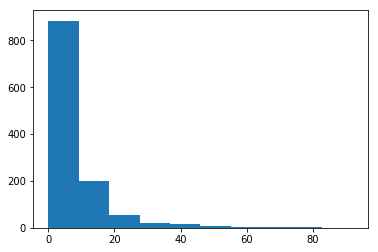

In [51]:
# Plot the length of each line as a histogram
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist([len(line) for line in tokenized_lines])
plt.show()